Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax, Total, Date, Time, Payment method, Cost of goods sold (cogs), Gross margin percentage, Gross income, and Rating.

To predict sales analysis and suggest improvements, we'll need to perform the following steps:

Data Cleaning: Check for any missing or inconsistent data.
Exploratory Data Analysis (EDA): Analyze the sales trends, customer demographics, and product performance.
Sales Forecasting: Use historical data to predict future sales.
Identify Patterns: Look for patterns in customer behavior, product popularity, and sales performance across different branches.
Recommendations: Based on the analysis, suggest strategies for business improvement.
Let's start with data cleaning and exploratory data analysis to understand the sales trends and patterns.

In [11]:
import pandas as pd

In [12]:
# Load the dataset
supermarket_sales = pd.read_csv('supermarket_sales.csv', encoding='ascii')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Check for missing values
missing_values = supermarket_sales.isnull().sum()
print('Missing values:\n', missing_values)

Missing values:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [15]:
# Check for duplicate rows
duplicate_rows = supermarket_sales.duplicated().sum()
print('\nDuplicate rows:', duplicate_rows)


Duplicate rows: 0


In [16]:
# Get a summary of the dataframe
summary = supermarket_sales.describe(include='all')
print('\nSummary:\n', summary)


Summary:
          Invoice ID Branch    City Customer type  Gender         Product line  \
count          1000   1000    1000          1000    1000                 1000   
unique         1000      3       3             2       2                    6   
top     750-67-8428      A  Yangon        Member  Female  Fashion accessories   
freq              1    340     340           501     501                  178   
mean            NaN    NaN     NaN           NaN     NaN                  NaN   
std             NaN    NaN     NaN           NaN     NaN                  NaN   
min             NaN    NaN     NaN           NaN     NaN                  NaN   
25%             NaN    NaN     NaN           NaN     NaN                  NaN   
50%             NaN    NaN     NaN           NaN     NaN                  NaN   
75%             NaN    NaN     NaN           NaN     NaN                  NaN   
max             NaN    NaN     NaN           NaN     NaN                  NaN   

         Unit pr

The dataset has no missing values and no duplicate rows,

There are 1000 entries, and each entry has a unique Invoice ID.
The dataset covers 3 branches, located in 3 different cities.
Customer types are categorized into 'Member' and 'Normal'.
There are entries for both 'Male' and 'Female' genders.
The product line is diversified into 6 categories.
The dataset includes various continuous variables like 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', and 'Rating'.
There are 89 unique dates and 506 unique times when purchases were made.
Payments were made using 3 different methods.
Next, we will perform exploratory data analysis to uncover sales trends and customer behaviors.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')


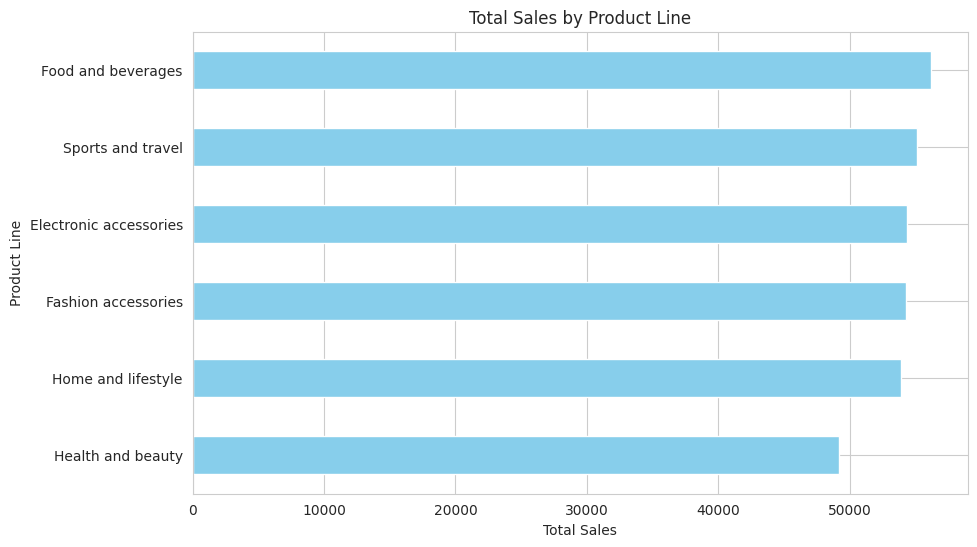

Sales by product line:
 Product line
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Fashion accessories       54305.8950
Electronic accessories    54337.5315
Sports and travel         55122.8265
Food and beverages        56144.8440
Name: Total, dtype: float64


In [19]:
# Sales by product line
plt.figure(figsize=(10, 6))
product_line_sales = supermarket_sales.groupby('Product line')['Total'].sum().sort_values()
product_line_sales.plot(kind='barh', color='skyblue')
plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()
print('Sales by product line:\n', product_line_sales)

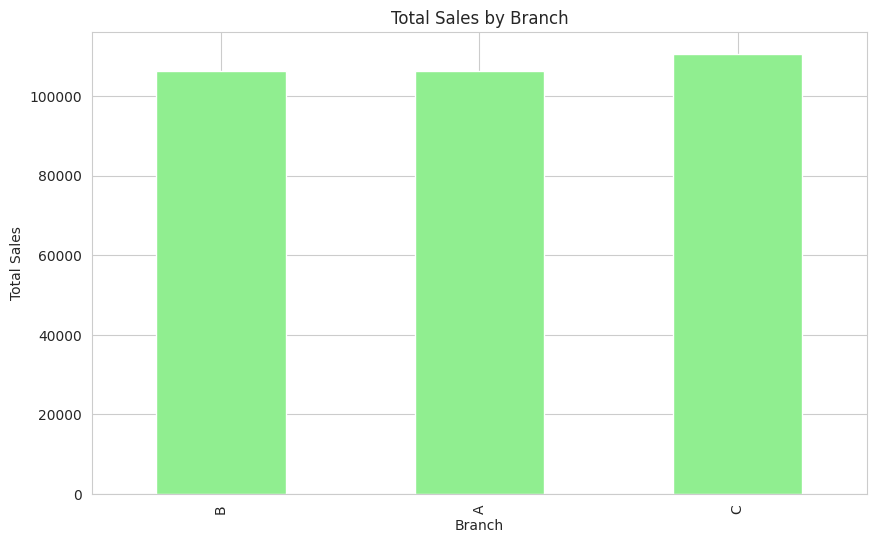


Sales by branch:
 Branch
B    106197.6720
A    106200.3705
C    110568.7065
Name: Total, dtype: float64


In [20]:
# Sales by branch
plt.figure(figsize=(10, 6))
branch_sales = supermarket_sales.groupby('Branch')['Total'].sum().sort_values()
branch_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()
print('\nSales by branch:\n', branch_sales)

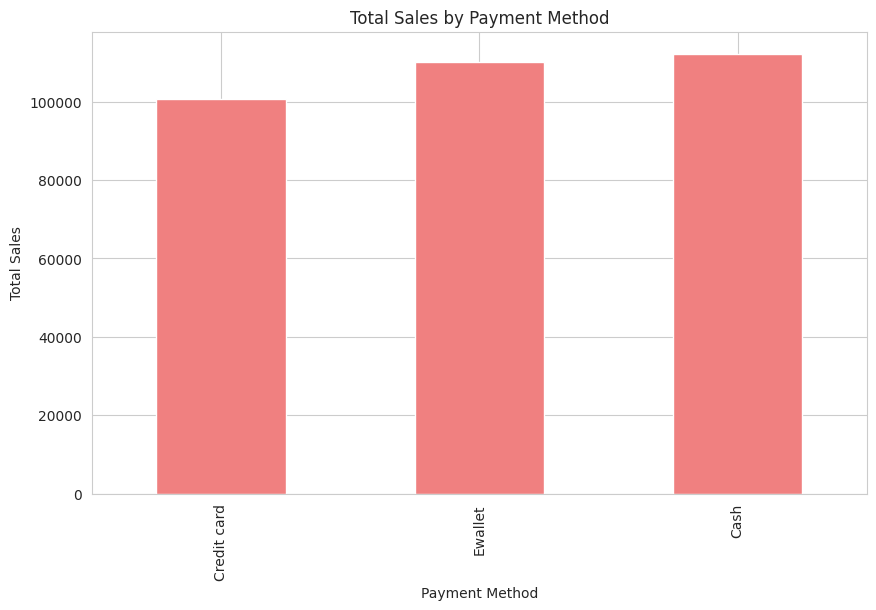


Sales by payment method:
 Payment
Credit card    100767.072
Ewallet        109993.107
Cash           112206.570
Name: Total, dtype: float64


In [21]:
# Sales by payment method
plt.figure(figsize=(10, 6))
payment_sales = supermarket_sales.groupby('Payment')['Total'].sum().sort_values()
payment_sales.plot(kind='bar', color='lightcoral')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()
print('\nSales by payment method:\n', payment_sales)

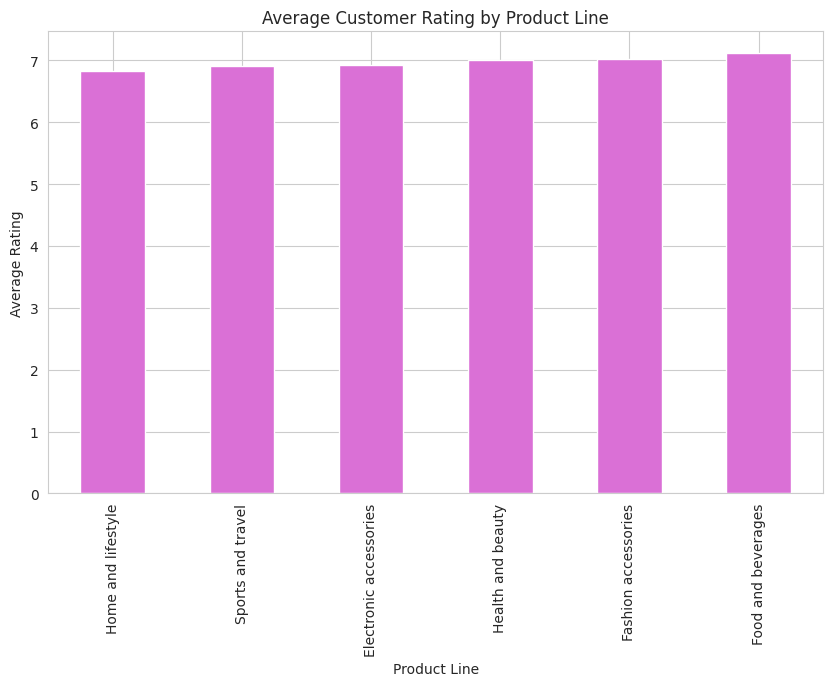


Average customer rating by product line:
 Product line
Home and lifestyle        6.837500
Sports and travel         6.916265
Electronic accessories    6.924706
Health and beauty         7.003289
Fashion accessories       7.029213
Food and beverages        7.113218
Name: Rating, dtype: float64


In [22]:
# Average customer rating by product line
plt.figure(figsize=(10, 6))
product_line_rating = supermarket_sales.groupby('Product line')['Rating'].mean().sort_values()
product_line_rating.plot(kind='bar', color='orchid')
plt.title('Average Customer Rating by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.show()
print('\nAverage customer rating by product line:\n', product_line_rating)

The exploratory data analysis has provided some insights into the sales trends and customer preferences:

Total Sales by Product Line: Food and beverages lead in sales, followed closely by sports and travel, and electronic accessories. Health and beauty products have the lowest total sales.

Total Sales by Branch: Branch C has the highest total sales, while Branches A and B are almost equal in their sales performance.

Total Sales by Payment Method: Cash payments account for the highest total sales, followed by Ewallet and credit card payments.

Average Customer Rating by Product Line: Food and beverages have the highest average customer rating, indicating customer satisfaction in this category. Home and lifestyle products have the lowest average rating.

Based on these findings, here are some suggestions to improve business:

Product Line Focus: Increase marketing efforts for health and beauty products to boost sales in this category.
Branch Performance: Investigate why Branch C performs better than A and B to replicate successful strategies across all branches.
Payment Incentives: Since cash payments are most popular, consider offering incentives for using alternative payment methods to increase their usage.
Customer Satisfaction: Explore the reasons behind the lower ratings in the home and lifestyle category to improve customer satisfaction.
Next, we can perform a more detailed analysis of customer demographics, time-based sales trends, and correlations between variables such as gross income and customer ratings.

In [23]:
from tqdm.notebook import tqdm

In [24]:
# Load the dataset
supermarket_sales = pd.read_csv('supermarket_sales.csv', encoding='ascii')

In [25]:
# Convert 'Date' to datetime format
supermarket_sales['Date'] = pd.to_datetime(supermarket_sales['Date'])

In [26]:
# Extract day of the week and month from 'Date'
supermarket_sales['DayOfWeek'] = supermarket_sales['Date'].dt.day_name()
supermarket_sales['Month'] = supermarket_sales['Date'].dt.month_name()


In [27]:
# Sales trends by day of the week
weekly_sales = supermarket_sales.groupby('DayOfWeek')['Total'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [28]:
# Sales trends by month
monthly_sales = supermarket_sales.groupby('Month')['Total'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [29]:
# Display the sales trends
print('Sales trends by day of the week:\n', weekly_sales)
print('\nSales trends by month:\n', monthly_sales)

Sales trends by day of the week:
 DayOfWeek
Monday       37899.0780
Tuesday      51482.2455
Wednesday    43731.1350
Thursday     45349.2480
Friday       43926.3405
Saturday     56120.8095
Sunday       44457.8925
Name: Total, dtype: float64

Sales trends by month:
 Month
January      116291.868
February      97219.374
March        109455.507
April               NaN
May                 NaN
June                NaN
July                NaN
August              NaN
September           NaN
October             NaN
November            NaN
December            NaN
Name: Total, dtype: float64


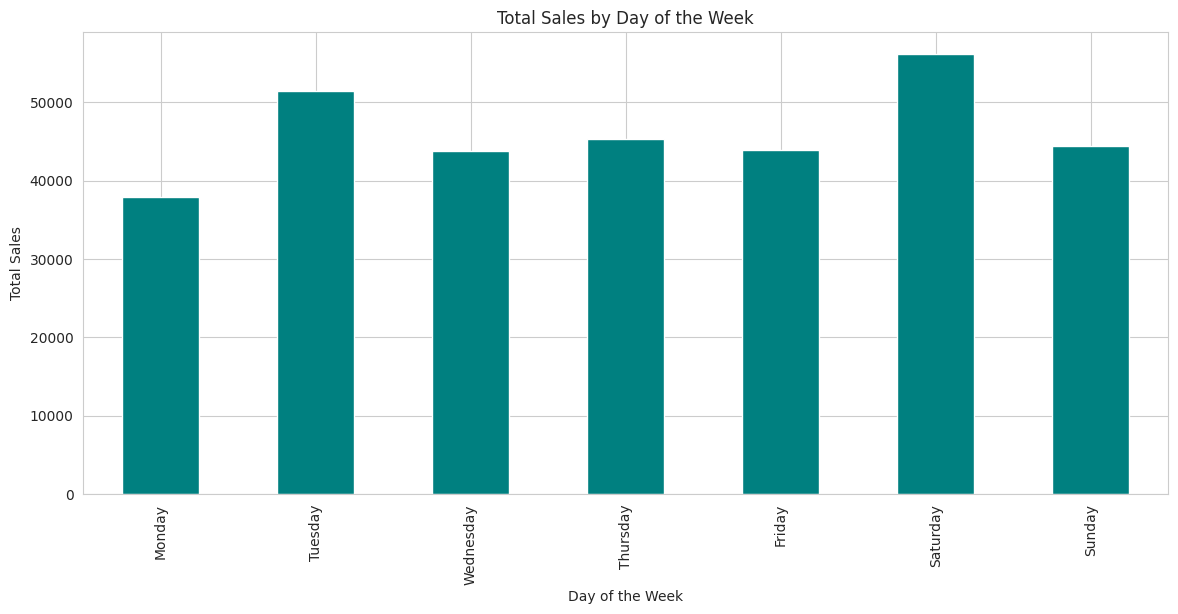

In [30]:
# Plot the sales trends
plt.figure(figsize=(14, 6))
weekly_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

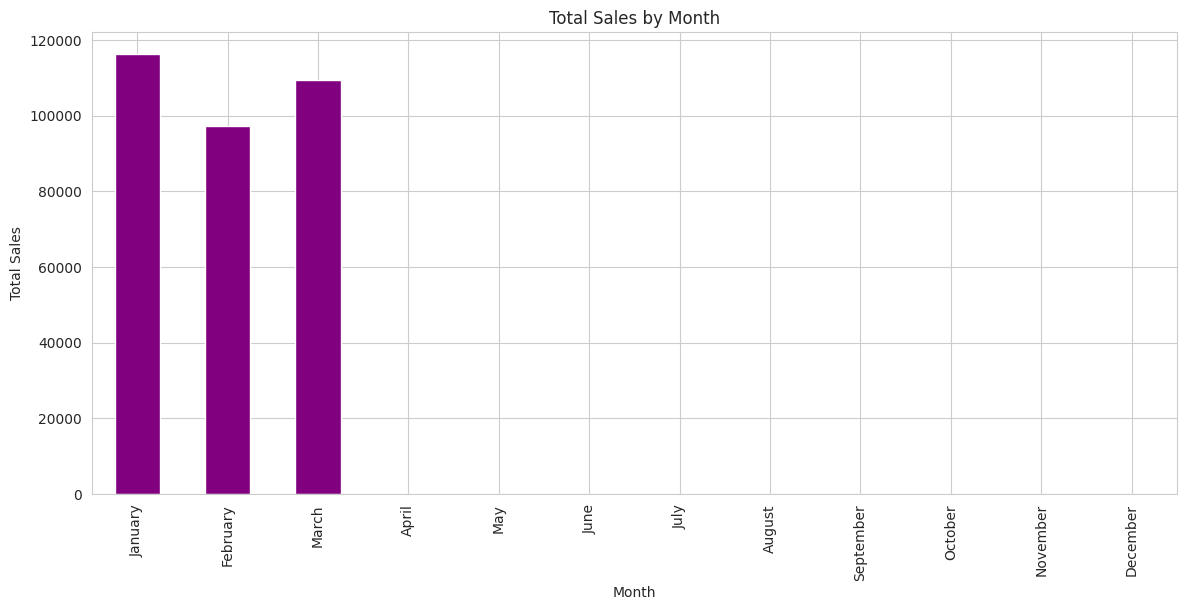

In [31]:
plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='bar', color='purple')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [41]:
# Calculating the correlation between gross income and customer ratings

In [42]:

# Display the correlation
print('Correlation between gross income and customer ratings:\n', supermarket_sales[['gross income', 'Rating']].corr())



Correlation between gross income and customer ratings:
               gross income    Rating
gross income      1.000000 -0.036442
Rating           -0.036442  1.000000


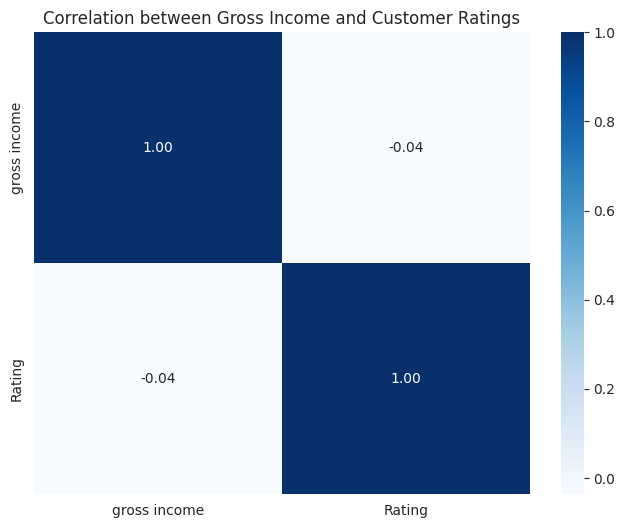

In [43]:
# Plotting the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(supermarket_sales[['gross income', 'Rating']].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation between Gross Income and Customer Ratings')
plt.show()



In [44]:
# Average sales by gender
avg_sales_by_gender = supermarket_sales.groupby('Gender')['Total'].mean()



In [45]:
# Average sales by customer type
avg_sales_by_customer_type = supermarket_sales.groupby('Customer type')['Total'].mean()



In [46]:
# Display the average sales by gender
print('\nAverage sales by gender:\n', avg_sales_by_gender)




Average sales by gender:
 Gender
0    335.095659
1    310.789226
Name: Total, dtype: float64


In [47]:
# Display the average sales by customer type
print('\nAverage sales by customer type:\n', avg_sales_by_customer_type)




Average sales by customer type:
 Customer type
0    327.791305
1    318.122856
Name: Total, dtype: float64


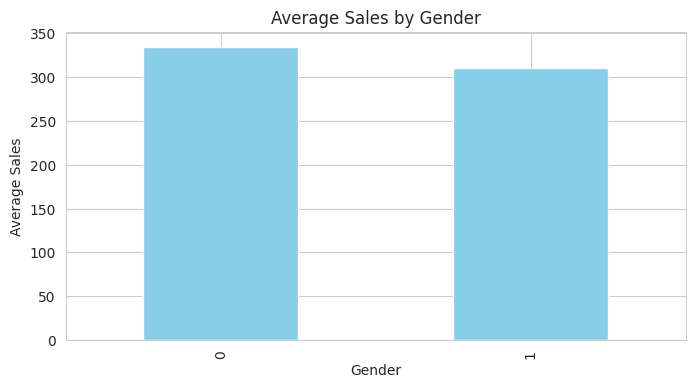

In [48]:
# Plotting the average sales by gender
plt.figure(figsize=(8, 4))
avg_sales_by_gender.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Sales')
plt.show()


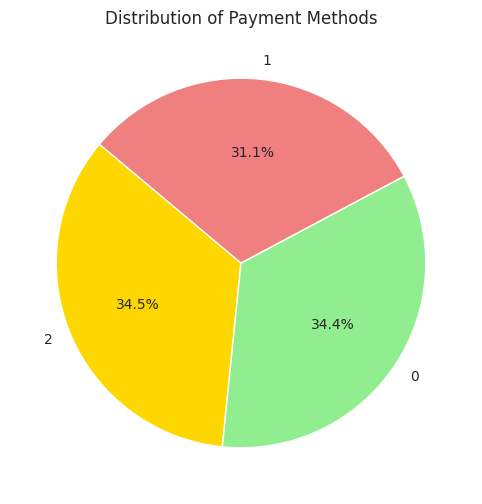

In [62]:
# Plotting the distribution of payment methods
plt.figure(figsize=(8, 6))
payment_method_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Payment Methods')
plt.ylabel('')  # Hide the y-label
plt.show()

In [63]:
# Analyzing sales performance by city
city_sales = supermarket_sales.groupby('City')['Total'].sum().sort_values(ascending=False)



In [64]:
# Analyzing the relationship between time of day and sales
# Convert 'Time' to datetime and extract hour for analysis
supermarket_sales['Hour'] = pd.to_datetime(supermarket_sales['Time']).dt.hour
sales_by_hour = supermarket_sales.groupby('Hour')['Total'].sum()



<ipython-input-64-787d2357b9ef>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  supermarket_sales['Hour'] = pd.to_datetime(supermarket_sales['Time']).dt.hour


In [65]:
# Explore the impact of customer type on sales performance
customer_type_sales = supermarket_sales.groupby('Customer type')['Total'].sum()



In [66]:
# Display the total sales by city
print('Total sales by city:\n', city_sales)



Total sales by city:
 City
1    110568.7065
2    106200.3705
0    106197.6720
Name: Total, dtype: float64


In [67]:
# Display the total sales by hour
print('\nTotal sales by hour:\n', sales_by_hour)




Total sales by hour:
 Hour
10    31421.4810
11    30377.3295
12    26065.8825
13    34723.2270
14    30828.3990
15    31179.5085
16    25226.3235
17    24445.2180
18    26030.3400
19    39699.5130
20    22969.5270
Name: Total, dtype: float64


In [68]:
# Display the total sales by customer type
print('\nTotal sales by customer type:\n', customer_type_sales)




Total sales by customer type:
 Customer type
0    164223.444
1    158743.305
Name: Total, dtype: float64


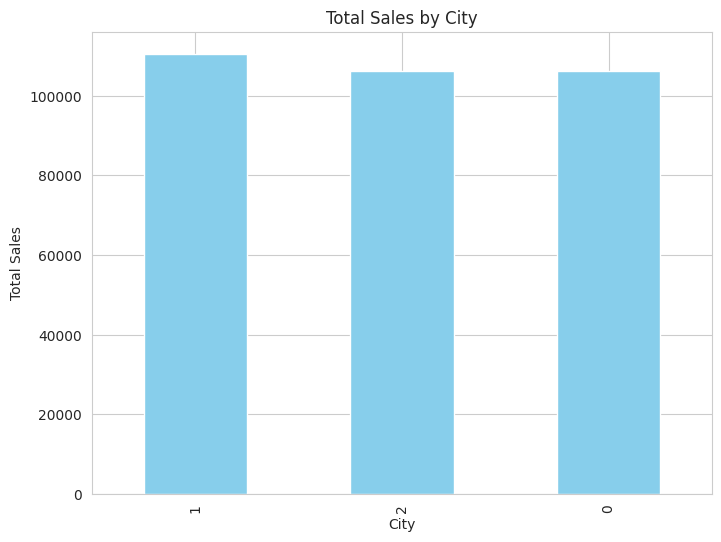

In [69]:
# Plotting the total sales by city
plt.figure(figsize=(8, 6))
city_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()


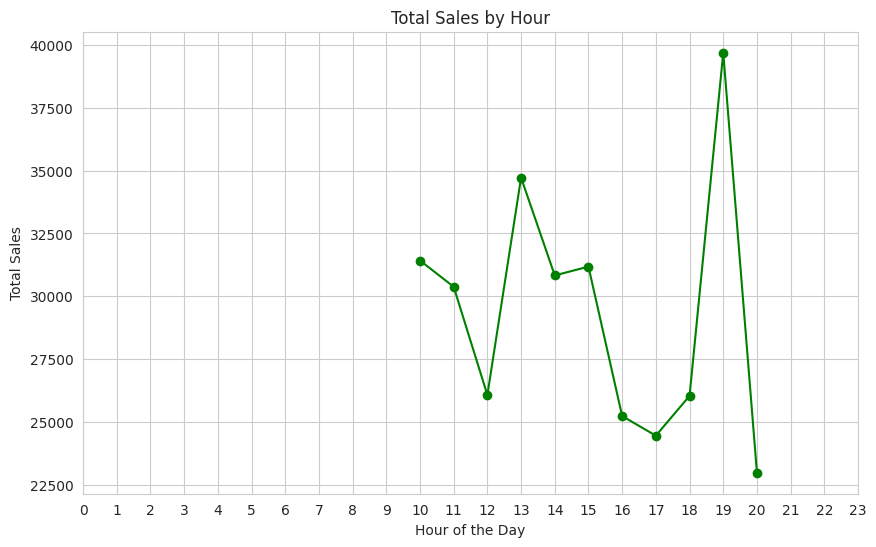

In [70]:

# Plotting the total sales by hour
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='line', marker='o', color='green')
plt.title('Total Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))  # Set x-ticks to show every hour
plt.grid(True)
plt.show()


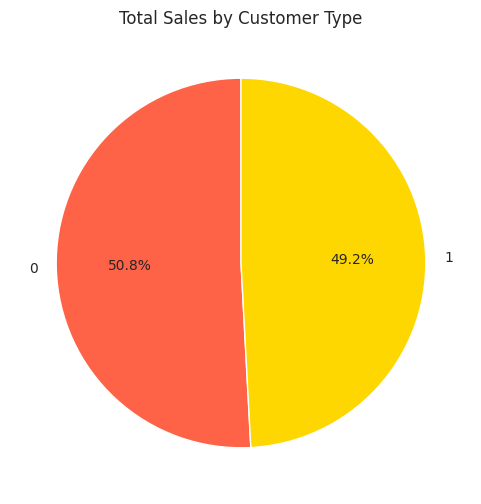

In [71]:

# Plotting the total sales by customer type
plt.figure(figsize=(6, 6))
customer_type_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['tomato', 'gold'])
plt.title('Total Sales by Customer Type')
plt.ylabel('')  # Hide the y-label
plt.show()

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
supermarket_sales = pd.read_csv('supermarket_sales.csv')

# Check for missing values
missing_values = supermarket_sales.isnull().sum()

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']:
    supermarket_sales[column] = label_encoder.fit_transform(supermarket_sales[column])

# Scale the features
scaler = StandardScaler()
supermarket_sales[['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating']] = scaler.fit_transform(supermarket_sales[['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating']])

# Select features and target variable
X = supermarket_sales.drop(['Total', 'Date', 'Time'], axis=1)  # Drop 'Total' as it is the target, and 'Date' and 'Time' as they are not numerical
y = supermarket_sales['Total']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Output the mean squared error
print('Mean Squared Error:', mse)

Mean Squared Error: 2.3810693573265143e-25
